# Analysing finetuned model vs irishman:

In [1]:
import glob
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from mgeval import core, utils
from sklearn.model_selection import LeaveOneOut

In [2]:
MODEL_1 = "finetuned"
MODEL_2 = "irishman"

SET_1_PATH = "data/evaluation/midi/{}/*".format(MODEL_1)
SET_2_PATH = "data/evaluation/midi/{}/*".format(MODEL_2)

SET_1_CALCULATED_METRICS_PATH = "data/evaluation/results/{}_vs_{}/{}_calculated_metrics.pkl".format(MODEL_1, MODEL_2, MODEL_1)
SET_2_CALCULATED_METRICS_PATH = "data/evaluation/results/{}_vs_{}/{}_calculated_metrics.pkl".format(MODEL_1, MODEL_2, MODEL_2)

ABSOLUTE_METRICS_STATISTICS_PATH = "data/evaluation/results/{}_vs_{}/absolute_metrics_statistics.pkl".format(MODEL_1, MODEL_2)
RELATIVE_METRICS_STATISTICS_PATH = "data/evaluation/results/{}_vs_{}/relative_metrics_statistics.pkl".format(MODEL_1, MODEL_2)

## Absolute measurement: statistic analysis


Assign sample dataset path

In [3]:
set1 = glob.glob(SET_1_PATH)
print(set1)

['data/evaluation/midi/finetuned/dialog_40_message_1.mid', 'data/evaluation/midi/finetuned/dialog_58_message_1.mid', 'data/evaluation/midi/finetuned/dialog_75_message_1.mid', 'data/evaluation/midi/finetuned/dialog_88_message_1.mid', 'data/evaluation/midi/finetuned/dialog_63_message_1.mid', 'data/evaluation/midi/finetuned/dialog_73_message_1.mid', 'data/evaluation/midi/finetuned/dialog_10_message_1.mid', 'data/evaluation/midi/finetuned/dialog_81_message_1.mid', 'data/evaluation/midi/finetuned/dialog_33_message_1.mid', 'data/evaluation/midi/finetuned/dialog_1_message_1.mid', 'data/evaluation/midi/finetuned/dialog_0_message_1.mid', 'data/evaluation/midi/finetuned/dialog_32_message_1.mid', 'data/evaluation/midi/finetuned/dialog_28_message_1.mid', 'data/evaluation/midi/finetuned/dialog_87_message_1.mid', 'data/evaluation/midi/finetuned/dialog_26_message_1.mid', 'data/evaluation/midi/finetuned/dialog_18_message_1.mid', 'data/evaluation/midi/finetuned/dialog_14_message_1.mid', 'data/evaluatio

Assign baseline dataset path

In [4]:
set2 = glob.glob(SET_2_PATH)
print(set2)

['data/evaluation/midi/irishman/song_80.mid', 'data/evaluation/midi/irishman/song_70.mid', 'data/evaluation/midi/irishman/song_20.mid', 'data/evaluation/midi/irishman/song_85.mid', 'data/evaluation/midi/irishman/song_28.mid', 'data/evaluation/midi/irishman/song_54.mid', 'data/evaluation/midi/irishman/song_95.mid', 'data/evaluation/midi/irishman/song_53.mid', 'data/evaluation/midi/irishman/song_7.mid', 'data/evaluation/midi/irishman/song_74.mid', 'data/evaluation/midi/irishman/song_23.mid', 'data/evaluation/midi/irishman/song_90.mid', 'data/evaluation/midi/irishman/song_94.mid', 'data/evaluation/midi/irishman/song_67.mid', 'data/evaluation/midi/irishman/song_45.mid', 'data/evaluation/midi/irishman/song_97.mid', 'data/evaluation/midi/irishman/song_10.mid', 'data/evaluation/midi/irishman/song_83.mid', 'data/evaluation/midi/irishman/song_73.mid', 'data/evaluation/midi/irishman/song_11.mid', 'data/evaluation/midi/irishman/song_38.mid', 'data/evaluation/midi/irishman/song_1.mid', 'data/evalu

### Build empty dictionary to fill in measurement across samples

In [5]:
num_samples = min(len(set2), len(set1))
display(num_samples)

93

In [6]:
def init_eval_dict(num_samples):
    return {
        # Pitch-based features
        'total_used_pitch': np.zeros((num_samples, 1)),
        'total_pitch_class_histogram': np.zeros((num_samples, 12)),
        'pitch_class_transition_matrix': np.zeros((num_samples, 12, 12)),
        'pitch_range': np.zeros((num_samples, 1)),
        'avg_pitch_shift': np.zeros((num_samples, 1)),
        # Rhythm-based features
        'total_used_note': np.zeros((num_samples, 1)),
        'avg_IOI': np.zeros((num_samples, 1)),
        'note_length_hist': np.zeros((num_samples, 12)),
        'note_length_transition_matrix': np.zeros((num_samples, 12, 12)),
    }

set1_eval = init_eval_dict(num_samples)
set2_eval = init_eval_dict(num_samples)

List of metrics to calculate

In [7]:
metrics_list = set1_eval.keys()

### Calculate absolute metrics

First dataset

In [8]:
for i in range(0, num_samples):
    feature = core.extract_feature(set1[i])
    for metric in metrics_list:
        set1_eval[metric][i] = getattr(core.metrics(), metric)(feature)

Write set1_eval calculated metrics

In [9]:
with open(SET_1_CALCULATED_METRICS_PATH, "wb") as f:
    pickle.dump(set1_eval, f)

Second dataset

In [10]:
for i in range(0, num_samples):
    feature = core.extract_feature(set2[i])
    for metric in metrics_list:
        set2_eval[metric][i] = getattr(core.metrics(), metric)(feature)

Write set2_eval calculated metrics

In [11]:
with open(SET_2_CALCULATED_METRICS_PATH, "wb") as f:
    pickle.dump(set2_eval, f)

Statistic analysis: absolute measurement

In [12]:
summary_stats = {}
for metric in metrics_list:
    set1_mean = np.mean(set1_eval[metric], axis=0)
    set1_std = np.std(set1_eval[metric], axis=0)
    set2_mean = np.mean(set2_eval[metric], axis=0)
    set2_std = np.std(set2_eval[metric], axis=0)
    summary_stats[metric] = {
        MODEL_1: {'mean': set1_mean.tolist(), 'std': set1_std.tolist()},
        MODEL_2: {'mean': set2_mean.tolist(), 'std': set2_std.tolist()}
    }

    print('------------------------------------------------------------------------------------------------')
    print('Metric: {}'.format(metric))
    print('{} => Mean: {}, Std: {}'.format(MODEL_1, set1_mean, set1_std))
    print('{} => Mean: {}, Std: {}'.format(MODEL_2, set2_mean, set2_std))
    print('------------------------------------------------------------------------------------------------\n')

------------------------------------------------------------------------------------------------
Metric: total_used_note
finetuned => Mean: [150.98924731], Std: [85.86567337]
irishman => Mean: [187.91397849], Std: [102.08900354]
------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------
Metric: avg_pitch_shift
finetuned => Mean: [2.40154879], Std: [0.9076836]
irishman => Mean: [2.75986702], Std: [0.60666138]
------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------
Metric: note_length_transition_matrix
finetuned => Mean: [[6.98924731e-01 0.00000000e+00 2.15053763e-01 5.37634409e-02
  1.82795699e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e

Write absolute metrics statistics

In [13]:
with open(ABSOLUTE_METRICS_STATISTICS_PATH, "wb") as f:
    pickle.dump(summary_stats, f)

## Relative measurement: generalizes the result among features with various dimensions


the features are sum- marized to 
- the intra-set distances
- the difference of intra-set and inter-set distances.

exhaustive cross-validation for intra-set distances measurement

In [14]:
loo = LeaveOneOut()
loo.get_n_splits(np.arange(num_samples))
set1_intra = np.zeros((num_samples, len(metrics_list), num_samples - 1))
set2_intra = np.zeros((num_samples, len(metrics_list), num_samples - 1))
for i in range(len(metrics_list)):
    for train_index, test_index in loo.split(np.arange(num_samples)):
        set1_intra[test_index[0]][i] = utils.c_dist(set1_eval[metrics_list[i]][test_index], set1_eval[metrics_list[i]][train_index])
        set2_intra[test_index[0]][i] = utils.c_dist(set2_eval[metrics_list[i]][test_index], set2_eval[metrics_list[i]][train_index])

exhaustive cross-validation for inter-set distances measurement

In [15]:
loo = LeaveOneOut()
loo.get_n_splits(np.arange(num_samples))
sets_inter = np.zeros((num_samples, len(metrics_list), num_samples))

for i in range(len(metrics_list)):
    for train_index, test_index in loo.split(np.arange(num_samples)):
        sets_inter[test_index[0]][i] = utils.c_dist(set1_eval[metrics_list[i]][test_index], set2_eval[metrics_list[i]])

visualization of intra-set and inter-set distances

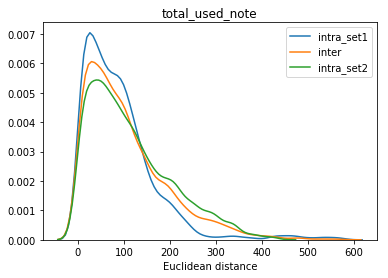

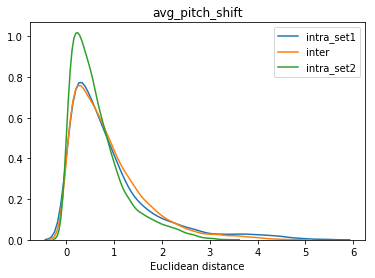

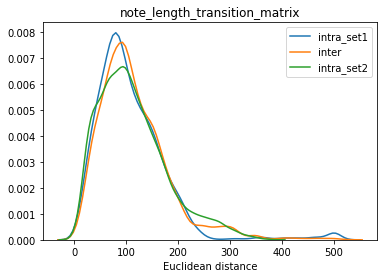

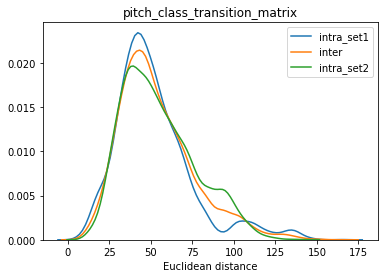

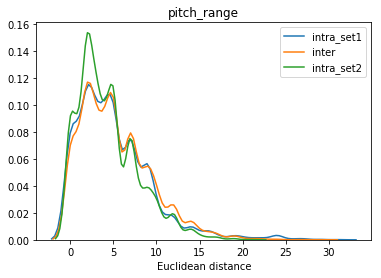

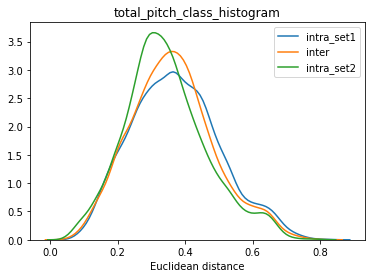

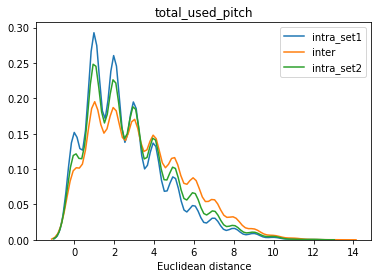

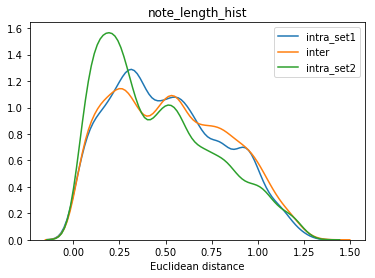

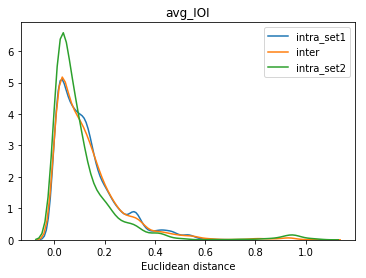

In [16]:
plot_set1_intra = np.transpose(set1_intra,(1, 0, 2)).reshape(len(metrics_list), -1)
plot_set2_intra = np.transpose(set2_intra,(1, 0, 2)).reshape(len(metrics_list), -1)
plot_sets_inter = np.transpose(sets_inter,(1, 0, 2)).reshape(len(metrics_list), -1)
for i in range(0,len(metrics_list)):
    sns.kdeplot(plot_set1_intra[i], label='intra_set1')
    sns.kdeplot(plot_sets_inter[i], label='inter')
    sns.kdeplot(plot_set2_intra[i], label='intra_set2')

    plt.title(metrics_list[i])
    plt.xlabel('Euclidean distance')
    plt.show()

the difference of intra-set and inter-set distances.

In [17]:
relative_stats = {}
for i in range(0, len(metrics_list)):
    kl1 = utils.kl_dist(plot_set1_intra[i], plot_sets_inter[i])
    overlap1 = utils.overlap_area(plot_set1_intra[i], plot_sets_inter[i])
    kl2 = utils.kl_dist(plot_set2_intra[i], plot_sets_inter[i])
    overlap2 = utils.overlap_area(plot_set2_intra[i], plot_sets_inter[i])
    metric = metrics_list[i]
    relative_stats[metric] = {
        MODEL_1: {
            'kl_divergence': kl1,
            'overlap_area': overlap1
        },
        MODEL_2: {
            'kl_divergence': kl2,
            'overlap_area': overlap2
        }
    }
    print('------------------------------------------------------------------------------------------------')
    print('Metric: {}'.format(metric))
    print('{} => Kullback–Leibler divergence: {}, Overlap area: {}'.format(MODEL_1, kl1, overlap1))
    print('{} => Kullback–Leibler divergence: {}, Overlap area: {}'.format(MODEL_2, kl2, overlap2))
    print('------------------------------------------------------------------------------------------------\n')

------------------------------------------------------------------------------------------------
Metric: total_used_note
finetuned => Kullback–Leibler divergence: 0.0507887279266, Overlap area: 0.862733332905
irishman => Kullback–Leibler divergence: 0.123870558934, Overlap area: 0.907278882867
------------------------------------------------------------------------------------------------



mgeval/utils.py:25: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return integrate.quad(lambda x: min(pdf_A(x), pdf_B(x)), np.min((np.min(A), np.min(B))), np.max((np.max(A), np.max(B))))[0]


------------------------------------------------------------------------------------------------
Metric: avg_pitch_shift
finetuned => Kullback–Leibler divergence: 0.0188594745552, Overlap area: 0.917762503702
irishman => Kullback–Leibler divergence: 0.00614340608159, Overlap area: 0.82996689482
------------------------------------------------------------------------------------------------



mgeval/utils.py:25: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(lambda x: min(pdf_A(x), pdf_B(x)), np.min((np.min(A), np.min(B))), np.max((np.max(A), np.max(B))))[0]


------------------------------------------------------------------------------------------------
Metric: note_length_transition_matrix
finetuned => Kullback–Leibler divergence: 0.037581134038, Overlap area: 0.932501757179
irishman => Kullback–Leibler divergence: 0.19064683845, Overlap area: 0.933972419391
------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------
Metric: pitch_class_transition_matrix
finetuned => Kullback–Leibler divergence: 0.0236214647066, Overlap area: 0.934787963725
irishman => Kullback–Leibler divergence: 0.0592464187078, Overlap area: 0.945943670358
------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------
Metric: pitch_range
finetuned => Kullback–Leibler divergence: 0.0275062650754, Overlap are

Write relative metrics statistics

In [18]:
with open(RELATIVE_METRICS_STATISTICS_PATH, "wb") as f:
    pickle.dump(relative_stats, f)